In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
delhivery_df = pd.read_csv('delhivery_data.txt',sep=',')

In [3]:
delhivery_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


<h2>Defining Problem Statement and Analysing basic metrics</h2>
<h3>We have to create new features from the existing once, finding is their any similarity between 2 different features using hypothesis testing, applying standerdizing technique like StandardScaler, outlyer detuction, converting categorical variables to category using one hot encoding.</h3>

In [4]:
delhivery_df.shape

(144867, 24)

<h3>their are total 24 features and 144867 rows in the given data set.</h3>

In [5]:
delhivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

<h3>we can observe that the data is a mixed of both object data types and float and int data types mostly</h3>
<h3>1 bool type 10 float type 1 int type 12 object type</h3>

In [6]:
delhivery_df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


<h3>we can observe that all the columns are effected by outlyers as the gap between 75% value and the max value is large in all the columns</h3>
<h3>Also we can observe that the mean and the std are close in almost all the columns from this we can conclude that their are more outlyers present in the data which is even effecting the std too.</h3>

In [7]:
delhivery_df.describe(include='object')

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-10-01 05:04:55.268931,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153784927255069118,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


<h3>the trip_creation_time column is having 14817 unique columns the route_type is having 2 unique values trip_uuid is having 14817 unique values so from the above data it is clear that their are no unique columns so we may need to do group by inorder to get the unique trip_UUId </h3>

In [8]:
delhivery_df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

<h3>except the source_name,destination_name all the other coulmns are not having any missing values</h3>

In [9]:
delhivery_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [10]:
delhivery_df = delhivery_df.drop(['is_cutoff','cutoff_factor','cutoff_timestamp','segment_factor','factor'],axis=1)

In [11]:
delhivery_df.shape

(144867, 19)

<h3>after removing the unknown fields in the data we are left with 19 coulmns only</h3>

In [12]:
delhivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

In [13]:
delhivery_df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370


In [14]:
delhivery_df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   start_scan_to_end_scan          8 non-null      float64
 1   actual_distance_to_destination  8 non-null      float64
 2   actual_time                     8 non-null      float64
 3   osrm_time                       8 non-null      float64
 4   osrm_distance                   8 non-null      float64
 5   segment_actual_time             8 non-null      float64
 6   segment_osrm_time               8 non-null      float64
 7   segment_osrm_distance           8 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes


In [15]:
def all_plots(df):
    plt.figure(figsize=(20,35))
    for i in range(len(df.describe().columns)):
        plt.subplot(12,1,i+1)
        sns.boxplot(data=df,x=df.describe().columns[i])
        plt.ylabel(df.describe().columns[i])
    plt.show()

<h3>function used to plot the box plot of all categorical varibles</h3>

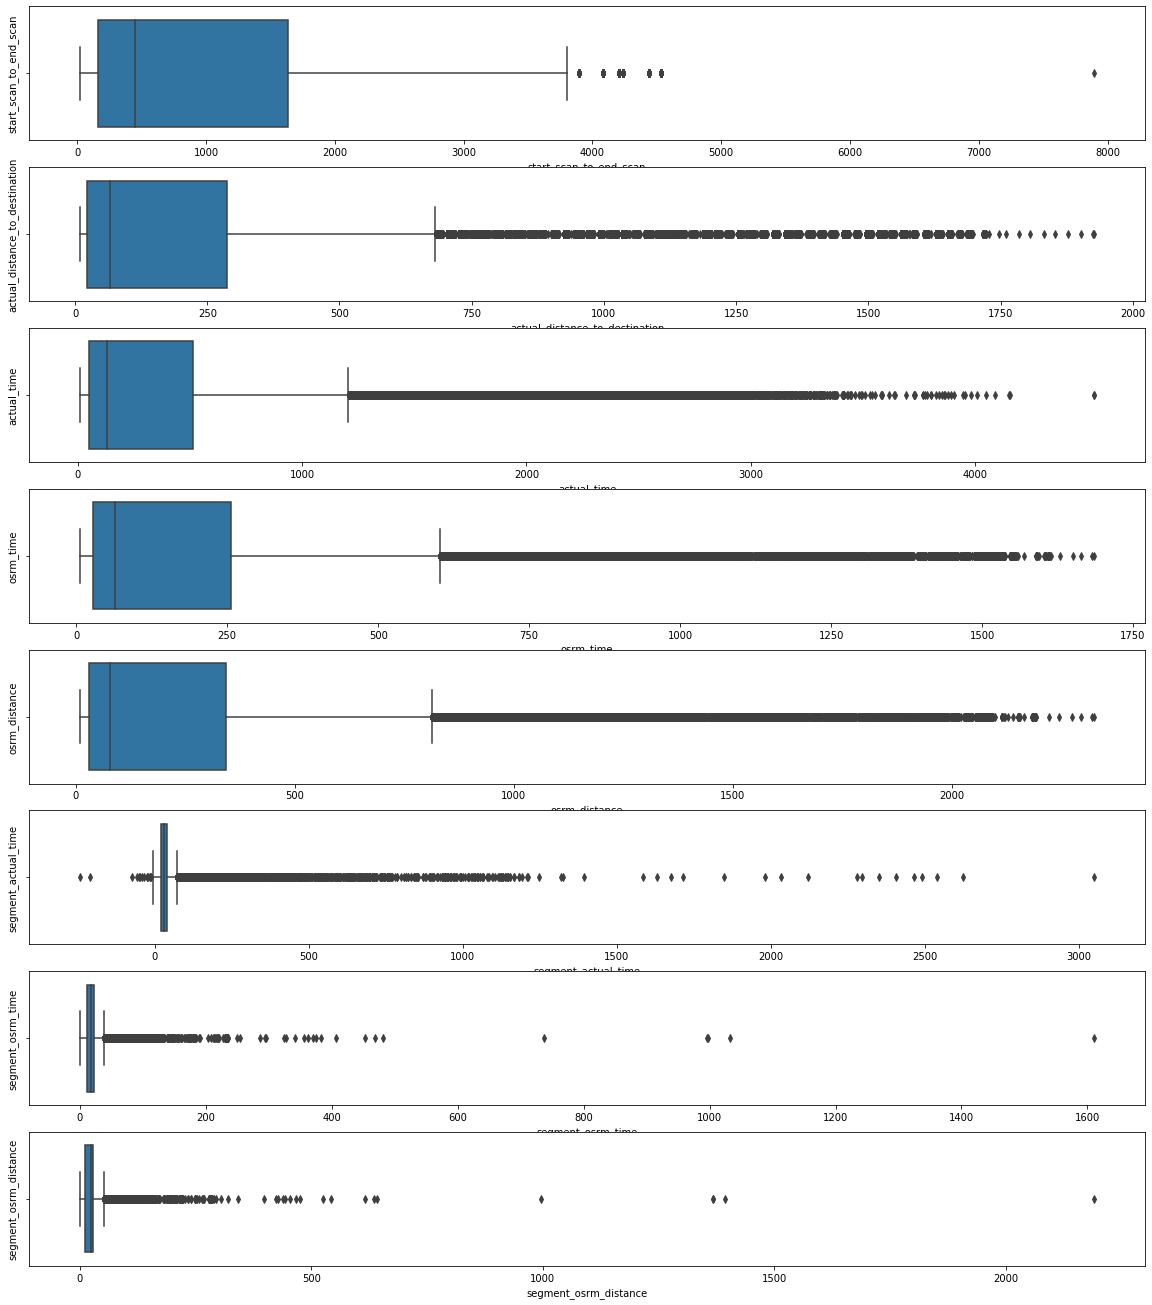

In [16]:
all_plots(delhivery_df)

<h3>from teh above we can observe that the date is having a lot of outlyers</h3>

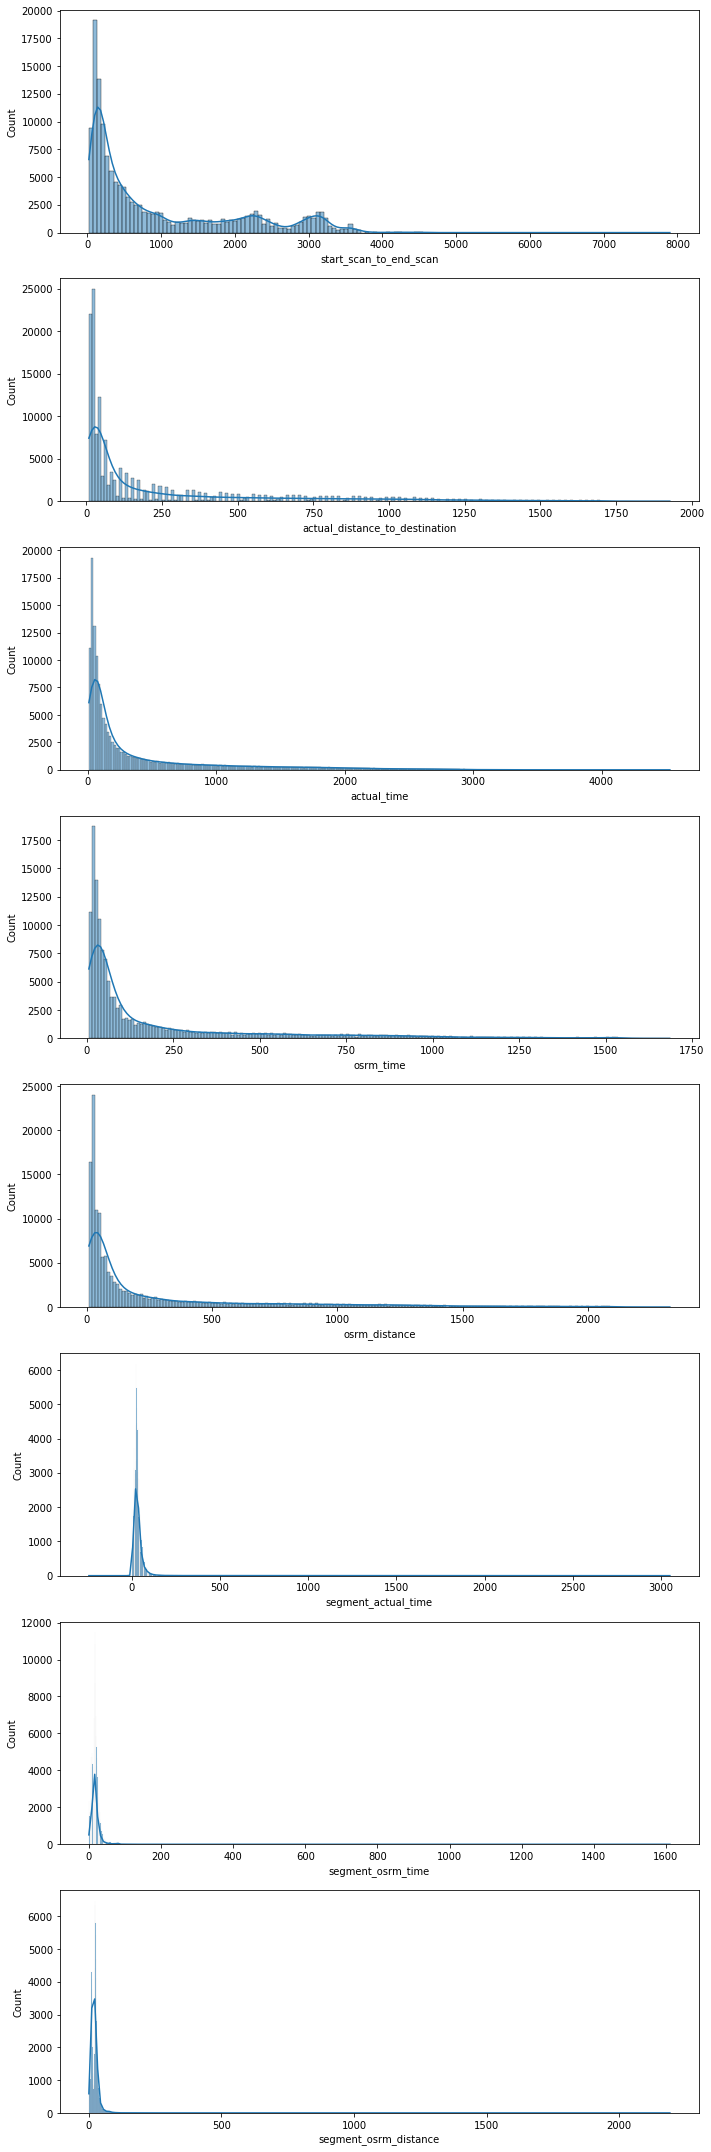

In [17]:
fig, axes = plt.subplots(8,1,figsize=(10,30))
for col, ax in zip(delhivery_df.describe().columns,axes.ravel()):
    sns.histplot(data=delhivery_df,x=col,ax=ax,kde=True)
    plt.xlabel(col)
fig.tight_layout()
plt.show()

<h3>from the above kde plot also it is confirmed that the data is consisting of a lot of outlyers</h3>

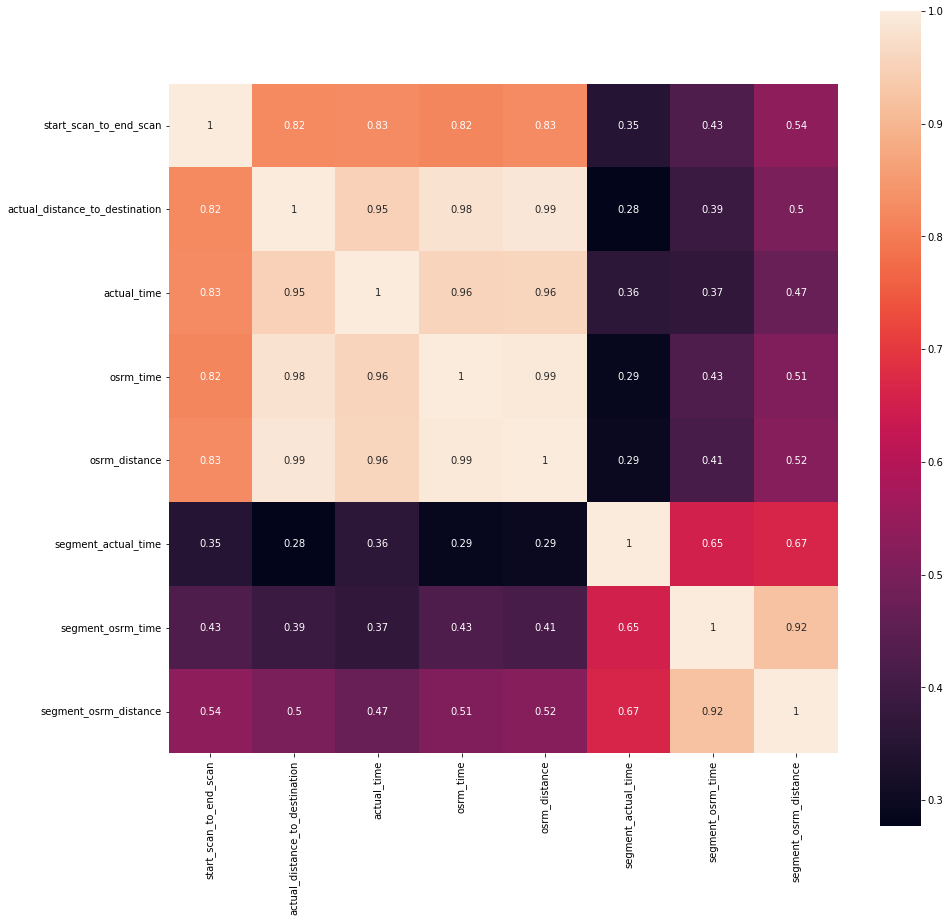

In [18]:
plt.figure(figsize=(15, 15))
sns.heatmap(delhivery_df.corr(method='spearman'), square=True,annot=True)
plt.show()

<h3>we can observe that the osrm_time and osrm_distancev is having highest corelation along with osrm_distance and osrm_time followed by osrm_distance and actual_distance_to_destination</h3>

In [19]:
delhivery_df.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [20]:
delhivery_df.groupby(by=['trip_uuid','source_center','destination_center']).sum()

start_scan_to_end_scan  \
trip_uuid               source_center destination_center                           
trip-153671041653548748 IND209304AAA  IND000000ACB                       22680.0   
                        IND462022AAA  IND209304AAA                       20979.0   
trip-153671042288605164 IND561203AAB  IND562101AAA                         174.0   
                        IND572101AAA  IND561203AAB                         732.0   
trip-153671043369099517 IND000000ACB  IND160002AAC                       10008.0   
...                                                                          ...   
trip-153861115439069069 IND628204AAA  IND627657AAA                         248.0   
                        IND628613AAA  IND627005AAA                         364.0   
                        IND628801AAA  IND628204AAA                          88.0   
trip-153861118270144424 IND583119AAA  IND583101AAA                         574.0   
                        IND583201AAA  IND583119AAA                         132.0   

                                                          actual_distance_to_destination  \
trip_uuid               source_center destination_center                                   
trip-153671041653548748 IND209304AAA  IND000000ACB                           3778.765471   
                        IND462022AAA  IND209304AAA                           5082.046634   
trip-153671042288605164 IND561203AAB  IND562101AAA                             53.310332   
                        IND572101AAA  IND561203AAB                            186.897974   
trip-153671043369099517 IND000000ACB  IND160002AAC                           1725.590250   
...                                                                                  ...   
trip-153861115439069069 IND628204AAA  IND627657AAA                             88.326510   
                        IND628613AAA  IND627005AAA                             90.049767   
                        IND628801AAA  IND628204AAA                             21.672374   
trip-153861118270144424 IND583119AAA  IND583101AAA                             62.547507   
                        IND583201AAA  IND583119AAA                             47.691610   

                                                          actual_time  \
trip_uuid               source_center destination_center                
trip-153671041653548748 IND209304AAA  IND000000ACB             6484.0   
                        IND462022AAA  IND209304AAA             9198.0   
trip-153671042288605164 IND561203AAB  IND562101AAA               96.0   
                        IND572101AAA  IND561203AAB              303.0   
trip-153671043369099517 IND000000ACB  IND160002AAC             2601.0   
...                                                               ...   
trip-153861115439069069 IND628204AAA  IND627657AAA              119.0   
                        IND628613AAA  IND627005AAA              173.0   
                        IND628801AAA  IND628204AAA               51.0   
trip-153861118270144424 IND583119AAA  IND583101AAA              278.0   
                        IND583201AAA  IND583119AAA               72.0   

                                                          osrm_time  \
trip_uuid               source_center destination_center              
trip-153671041653548748 IND209304AAA  IND000000ACB           3464.0   
                        IND462022AAA  IND209304AAA           4323.0   
trip-153671042288605164 IND561203AAB  IND562101AAA             55.0   
                        IND572101AAA  IND561203AAB            155.0   
trip-153671043369099517 IND000000ACB  IND160002AAC           1427.0   
...                                                             ...   
trip-153861115439069069 IND628204AAA  IND627657AAA            106.0   
                        IND628613AAA  IND627005AAA            108.0   
                        IND628801AAA  IND628204AAA             22.0   
trip-153861118270144424 IND583119AAA 

In [21]:
delhivery_df.groupby(by='trip_uuid').sum()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
trip_uuid,,,,,,,,
trip-153671041653548748,43659.0,8860.812105,15682.0,7787.0,10577.7647,1548.0,1008.0,1320.4733
trip-153671042288605164,906.0,240.208306,399.0,210.0,269.4308,141.0,65.0,84.1894
trip-153671043369099517,248631.0,68163.502238,112225.0,65768.0,89447.2488,3308.0,1941.0,2545.2678
trip-153671046011330457,200.0,28.529648,82.0,24.0,31.6475,59.0,16.0,19.8766
trip-153671052974046625,1586.0,239.007304,556.0,207.0,266.2914,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...
trip-153861095625827784,876.0,141.057373,186.0,148.0,162.9473,82.0,62.0,64.8551
trip-153861104386292051,120.0,25.130640,33.0,19.0,26.5333,21.0,11.0,16.0883
trip-153861106442901555,1263.0,93.743842,549.0,134.0,162.8499,281.0,88.0,104.8866


<h3>grouping on trip_uuid so that we can have the actual time and actual distance etc </h3>

In [22]:
delhivery_df['trip_uuid'].nunique()

14817

In [23]:
def source_splitting(data_df):
    data_df[['temp','source_state']] = data_df['source_name'].str.split('(',expand=True)
    data_df['source_state'] = data_df['source_state'].str.strip(')')
    data_df[['source_city','source_place','source_code']] = data_df['temp'].str.strip(')').str.split('_',n=2,expand=True)
    data_df.drop('temp',axis=1,inplace=True)
    return data_df

<h3>function used to extract the source_city,source_place,source_code,source_state from the source_name column</h3>

In [24]:
delhivery_df = source_splitting(delhivery_df)

In [25]:
delhivery_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_city,source_place,source_code
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,14.0,11.0,11.9653,14.0,11.0,11.9653,Gujarat,Anand,VUNagar,DC
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,24.0,20.0,21.7243,10.0,9.0,9.7590,Gujarat,Anand,VUNagar,DC
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,40.0,28.0,32.5395,16.0,7.0,10.8152,Gujarat,Anand,VUNagar,DC
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,62.0,40.0,45.5620,21.0,12.0,13.0224,Gujarat,Anand,VUNagar,DC
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,68.0,44.0,54.2181,6.0,5.0,3.9153,Gujarat,Anand,VUNagar,DC


In [26]:
def destination_splitting(data_df):
    data_df[['temp','destination_state']] = data_df['destination_name'].str.split('(',expand=True)
    data_df['destination_state'] = data_df['destination_state'].str.strip(')')
    data_df[['destination_city','destination_place','destination_code']] = data_df['temp'].str.strip(')').str.split('_',n=2,expand=True)
    data_df.drop('temp',axis=1,inplace=True)
    return data_df

<h3>function used to extract the destination_city,destination_place,destination_code,destination_state from the destination_name column</h3>

In [27]:
delhivery_df = destination_splitting(delhivery_df)

In [28]:
delhivery_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,source_state,source_city,source_place,source_code,destination_state,destination_city,destination_place,destination_code
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.0,11.9653,Gujarat,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,9.0,9.7590,Gujarat,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,7.0,10.8152,Gujarat,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,12.0,13.0224,Gujarat,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,5.0,3.9153,Gujarat,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D


In [29]:
delhivery_df['trip_creation_time'] = pd.to_datetime(delhivery_df['trip_creation_time'])

In [30]:
delhivery_df['trip_creation_year'] = delhivery_df['trip_creation_time'].dt.year
delhivery_df['trip_creation_month'] = delhivery_df['trip_creation_time'].dt.month
delhivery_df['trip_creation_day'] = delhivery_df['trip_creation_time'].dt.day

<h3>extracting the year month and day from trip creation time column </h3>

In [31]:
delhivery_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_city,source_place,source_code,destination_state,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_day
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,2018,9,20
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,2018,9,20
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,2018,9,20
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,2018,9,20
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,Anand,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,2018,9,20


In [32]:
delhivery_df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'source_state',
       'source_city', 'source_place', 'source_code', 'destination_state',
       'destination_city', 'destination_place', 'destination_code',
       'trip_creation_year', 'trip_creation_month', 'trip_creation_day'],
      dtype='object')

In [33]:
delhivery_df['time_taken'] = (pd.to_datetime(delhivery_df['od_end_time'])-pd.to_datetime(delhivery_df['od_start_time']))/np.timedelta64(1,'m')

<h3>calculating the minutes difference between od_end_time and od_start_time</h3>

In [34]:
# delhivery_df['time_taken'] = delhivery_df.apply(lambda x:pd.to_datetime(x['od_end_time'])-pd.to_datetime(x['od_start_time']),axis=1)

In [35]:
delhivery_df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_place,source_code,destination_state,destination_city,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_day,time_taken
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,2018,9,20,86.213637
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,2018,9,20,86.213637
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,2018,9,20,86.213637
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,2018,9,20,86.213637
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,VUNagar,DC,Gujarat,Khambhat,MotvdDPP,D,2018,9,20,86.213637


In [36]:
delhivery_df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'source_state',
       'source_city', 'source_place', 'source_code', 'destination_state',
       'destination_city', 'destination_place', 'destination_code',
       'trip_creation_year', 'trip_creation_month', 'trip_creation_day',
       'time_taken'],
      dtype='object')

In [37]:
delhivery_df['start_scan_to_end_scan']

0          86.0
1          86.0
2          86.0
3          86.0
4          86.0
          ...  
144862    427.0
144863    427.0
144864    427.0
144865    427.0
144866    427.0
Name: start_scan_to_end_scan, Length: 144867, dtype: float64

In [38]:
delhivery_aggre = delhivery_df.groupby(by='trip_uuid').sum()

In [39]:
delhivery_aggre.head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,time_taken
trip_uuid,,,,,,,,,,,,
trip-153671041653548748,43659.0,8860.812105,15682.0,7787.0,10577.7647,1548.0,1008.0,1320.4733,78702,351,468,43680.492537
trip-153671042288605164,906.0,240.208306,399.0,210.0,269.4308,141.0,65.0,84.1894,18162,81,108,913.174079
trip-153671043369099517,248631.0,68163.502238,112225.0,65768.0,89447.2488,3308.0,1941.0,2545.2678,179602,801,1068,248694.383681
trip-153671046011330457,200.0,28.529648,82.0,24.0,31.6475,59.0,16.0,19.8766,4036,18,24,200.989870
trip-153671052974046625,1586.0,239.007304,556.0,207.0,266.2914,340.0,115.0,146.7919,14126,63,84,1588.710998


<h2>Hypothesis Testing</h2>

<h2>ks test</h2>
<h3>its used to check wheather 2 series are following similar distribution or not </h3>
<h2>Assumptions of ks test </h2>
<h3>As ks test is non-parameter test(i.e., it did not have any assumptions).</h3>
<h2>H0(Null hypothesis)</h2>
<h3>distribution of start_scan_to_end_scan and time_taken are same</h3>
<h2>Ha(Alternate hypothesis)</h2>
<h3>distribution of start_scan_to_end_scan and time_taken are not same</h3>

In [40]:
stats.ks_2samp(delhivery_df['start_scan_to_end_scan'],delhivery_df['time_taken'])

Ks_2sampResult(statistic=0.0031684234504752717, pvalue=0.4611770659109279)

<h3>here we are using ks test in order to compare the distribution between start_scan_to_end_scan and time_taken </h3>

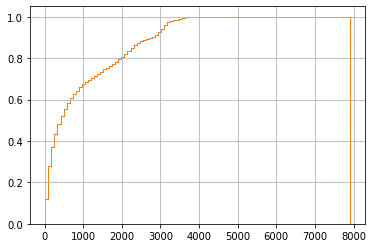

In [41]:
plt.grid()
a = plt.hist(delhivery_df['start_scan_to_end_scan'], bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(delhivery_df['time_taken'], bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

<h2>Here we can see that the pvalue=0.4611 which is > 0.05 so both the distribution are same so we fail to reject H0 </h2>

<h2>ks test</h2>
<h3>its used to check wheather 2 series are following similar distribution or not </h3>
<h2>Assumptions of ks test </h2>
<h3>As ks test is non-parameter test(i.e., it did not have any assumptions).</h3>
<h2>H0(Null hypothesis)</h2>
<h3>distribution of actual_time and osrm_time are same</h3>
<h2>Ha(Alternate hypothesis)</h2>
<h3>distribution of actual_time and osrm_time are not same</h3>

In [42]:
stats.ks_2samp(delhivery_aggre['actual_time'],delhivery_aggre['osrm_time'])

Ks_2sampResult(statistic=0.23115340487278124, pvalue=0.0)

In [43]:
from statsmodels.stats.weightstats import ztest

<h2>2-sample z Test</h2>
<h3>AS the number of samples are large(>30) will be using Z-test insted of T-test and also the sample mean and the varience are known.</h3>
<h2>Assumptions of Z-test</h2>
<h3>1) The population mean and standerd deviation are finite. 2) Population standerd deviation are known.</h3>
<h2>H0(Null hypothesis):- </h2>
<h3>(U1)Mean of actual time is equal (U2)Mean of osrm time</h3>
<h3>U1 = U2</h3>

<h2>Ha(Alternate Hypothesis):- </h2>
<h3>(U1)Mean of actual time is not equal (U2)Mean of osrm time</h3>
<h3>U1 != U2</h3>

<h3>alpha(significance level or type I error ):-</h3>
<h3>considering 5% significance level</h3>


In [44]:
ztest(delhivery_aggre['actual_time'],delhivery_aggre['osrm_time'])

(14.073444960610715, 5.5308133576654005e-45)

<h3>performing the z test between actual time and osrm time as pvalue=5.53*10^-64 which is < 0.05 so their means are not same we reject the H0 hypothesis </h3>

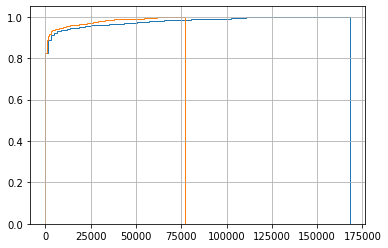

In [45]:
plt.grid()
a = plt.hist(delhivery_aggre['actual_time'], bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(delhivery_aggre['osrm_time'], bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

<h2>2-sample z Test</h2>
<h3>AS the number of samples are large(>30) will be using Z-test insted of T-test and also the sample mean and the varience are known.</h3>
<h2>Assumptions of Z-test</h2>
<h3>1) The population mean and standerd deviation are finite. 2) Population standerd deviation are known.</h3>
<h2>H0(Null hypothesis):- </h2>
<h3>(U1)Mean of actual time is equal (U2)segment actual time</h3>
<h3>U1 = U2</h3>

<h2>Ha(Alternate Hypothesis):- </h2>
<h3>(U1)Mean of actual time is not equal (U2)segment actual time</h3>
<h3>U1 != U2</h3>

<h3>alpha(significance level or type I error ):-</h3>
<h3>considering 5% significance level</h3>

In [46]:
ztest(delhivery_aggre['actual_time'],delhivery_aggre['segment_actual_time'])

(29.75724632324628, 1.3974700546955178e-194)

<h3>performing the z test between actual time and segment actual time as pvalue=1.3974700546955178e-194 which is < 0.05 so their means are not same we reject the H0 hypothesis</h3>

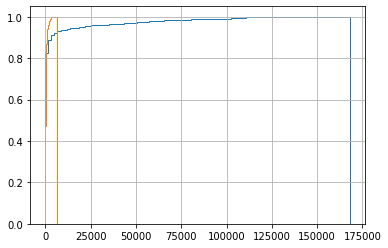

In [47]:
plt.grid()
a = plt.hist(delhivery_aggre['actual_time'], bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(delhivery_aggre['segment_actual_time'], bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

<h2>2-sample z Test</h2>
<h3>AS the number of samples are large(>30) will be using Z-test insted of T-test and also the sample mean and the varience are known.</h3>
<h2>Assumptions of Z-test</h2>
<h3>1) The population mean and standerd deviation are finite. 2) Population standerd deviation are known.</h3>
<h2>H0(Null hypothesis):- </h2>
<h3>(U1)Mean of osrm distance is equal (U2)segment osrm distance</h3>
<h3>U1 = U2</h3>

<h2>Ha(Alternate Hypothesis):- </h2>
<h3>(U1)Mean of osrm distance is not equal (U2)segment osrm distance</h3>
<h3>U1 != U2</h3>

<h3>alpha(significance level or type I error ):-</h3>
<h3>considering 5% significance level</h3>

In [48]:
ztest(delhivery_aggre['osrm_distance'],delhivery_aggre['segment_osrm_distance'])

(28.952997899197353, 2.572707746884534e-184)

<h3>performing the z test between osrm distance and segment osrm distance as pvalue=2.572707746884534e-184 which is < 0.05 so their means are not same we reject the H0 hypothesis</h3>

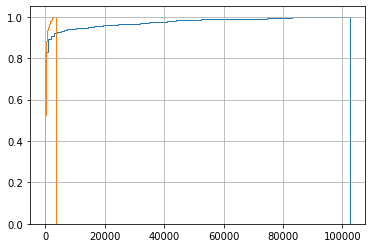

In [49]:
plt.grid()
a = plt.hist(delhivery_aggre['osrm_distance'], bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(delhivery_aggre['segment_osrm_distance'], bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

<h2>2-sample z Test</h2>
<h3>AS the number of samples are large(>30) will be using Z-test insted of T-test and also the sample mean and the varience are known.</h3>
<h2>Assumptions of Z-test</h2>
<h3>1) The population mean and standerd deviation are finite. 2) Population standerd deviation are known.</h3>
<h2>H0(Null hypothesis):- </h2>
<h3>(U1)Mean of osrm time is equal (U2)segment osrm time</h3>
<h3>U1 = U2</h3>

<h2>Ha(Alternate Hypothesis):- </h2>
<h3>(U1)Mean of osrm time is not equal (U2)segment osrm time</h3>
<h3>U1 != U2</h3>

<h3>alpha(significance level or type I error ):-</h3>
<h3>considering 5% significance level</h3>

In [50]:
ztest(delhivery_aggre['osrm_time'],delhivery_aggre['segment_osrm_time'])

(29.19742674380395, 2.090716045464437e-187)

<h3>performing the z test between osrm time and segment osrm time as pvalue=2.090716045464437e-187 which is < 0.05 so their means are not same we reject the H0 hypothesis</h3>

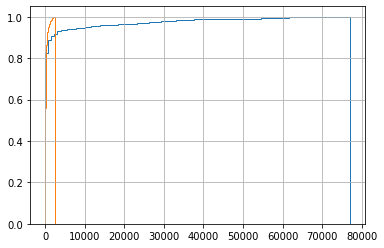

In [51]:
plt.grid()
a = plt.hist(delhivery_aggre['osrm_time'], bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(delhivery_aggre['segment_osrm_time'], bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

<h2>ks test</h2>
<h3>its used to check wheather 2 series are following similar distribution or not </h3>
<h2>Assumptions of ks test </h2>
<h3>As ks test is non-parameter test(i.e., it did not have any assumptions).</h3>
<h2>H0(Null hypothesis)</h2>
<h3>distribution of osrm time and segment osrm time are same</h3>
<h2>Ha(Alternate hypothesis)</h2>
<h3>distribution of osrm time and segment osrm time are not same</h3>

In [52]:
stats.ks_2samp(delhivery_aggre['osrm_time'],delhivery_aggre['segment_osrm_time'])

Ks_2sampResult(statistic=0.2400620908416008, pvalue=0.0)

<h2>Here we can see that the pvalue=0.0 which is < 0.05 so both the distribution are same so we reject H0 </h2>

In [53]:
delhivery_df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,time_taken
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.0,144867.000000,144867.000000,144867.000000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902,2018.0,9.120925,18.389723,961.759003
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066,0.0,0.326041,7.878764,1037.012613
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000,2018.0,9.000000,1.000000,20.702813
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010,2018.0,9.000000,14.000000,161.501292
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300,2018.0,9.000000,19.000000,449.236567
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325,2018.0,9.000000,25.000000,1634.950143
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370,2018.0,10.000000,30.000000,7898.551955


In [54]:
def all_plots(df):
    plt.figure(figsize=(15,35))
    for i in range(len(df.describe().columns)):
        plt.subplot(12,1,i+1)
        sns.boxplot(data=df,x=df.describe().columns[i])
        plt.ylabel(df.describe().columns[i])
    plt.show()

<h3>plotting the box plot of all the numerical variables</h3>

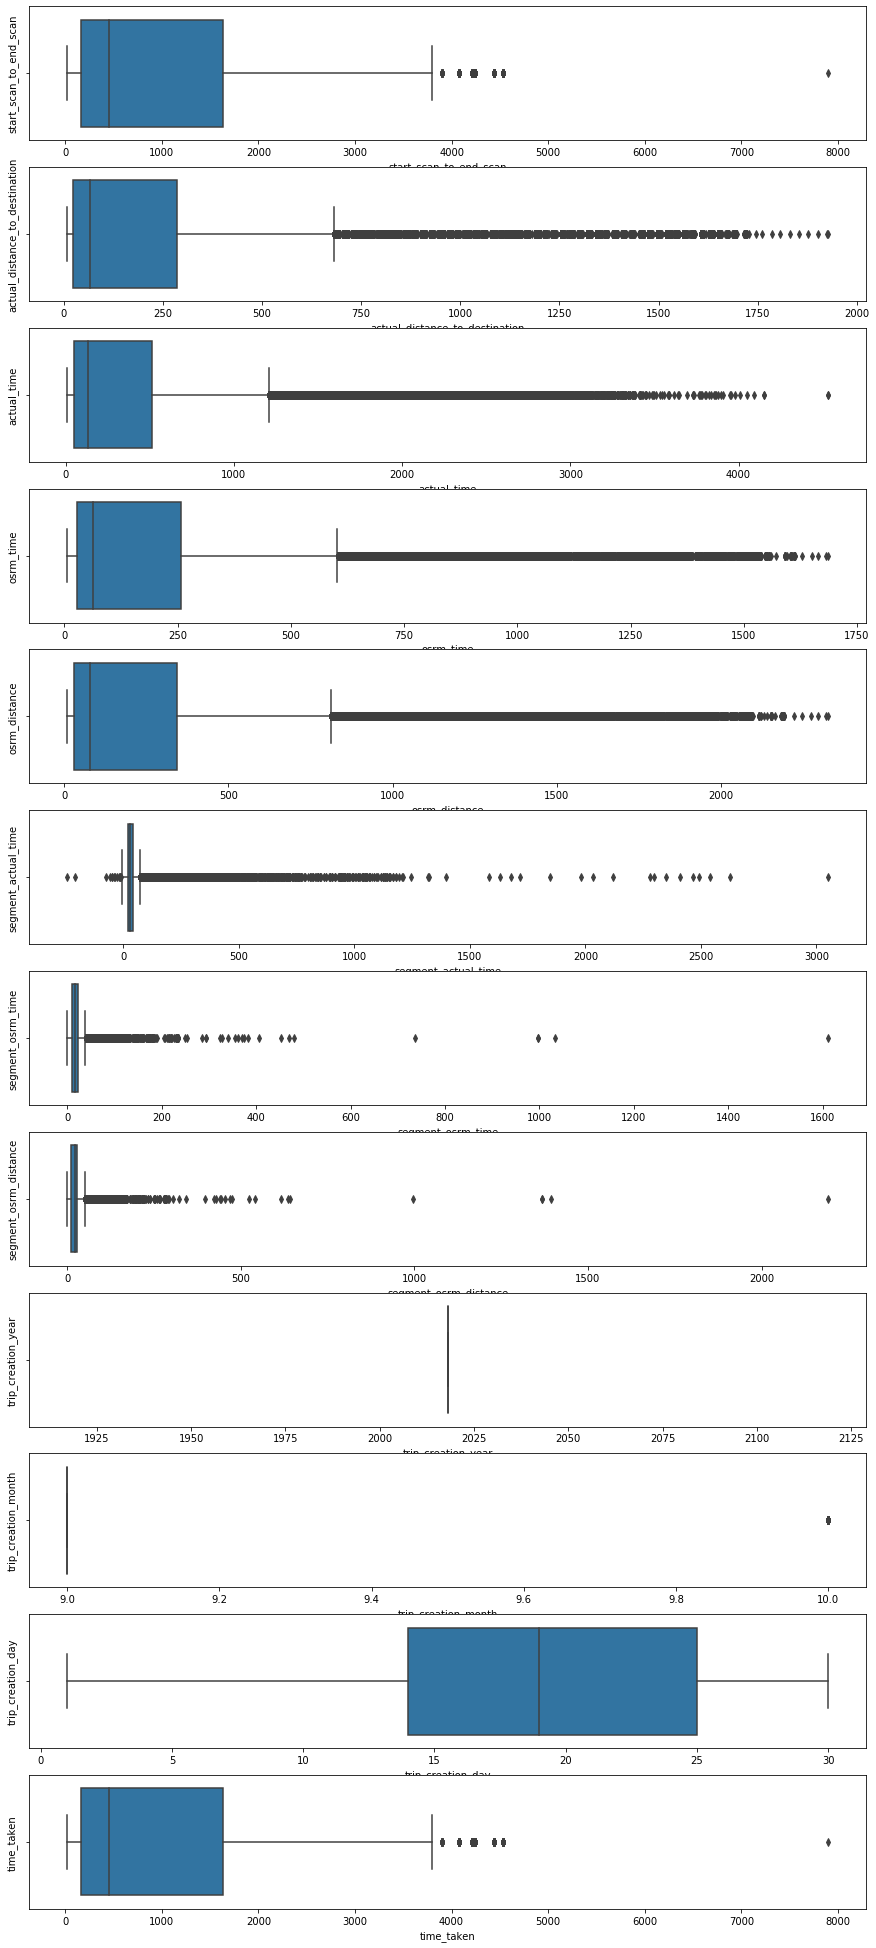

In [55]:
all_plots(delhivery_df)

In [56]:
q1, q3 = np.percentile(delhivery_df['start_scan_to_end_scan'],[25,75])

In [57]:
q3,q1,q3-q1

(1634.0, 161.0, 1473.0)

In [58]:
delhivery_df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'source_state',
       'source_city', 'source_place', 'source_code', 'destination_state',
       'destination_city', 'destination_place', 'destination_code',
       'trip_creation_year', 'trip_creation_month', 'trip_creation_day',
       'time_taken'],
      dtype='object')

In [59]:
delhivery_df['trip_creation_time'].nunique()

14817

In [60]:
delhivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  object        
 10  od_end_time                     144867 non-null  object 

In [61]:
for i in delhivery_df.columns:
    print('The unique values of the column:-  '+str(i))
    print(delhivery_df[i].unique())
    print(delhivery_df[i].nunique())
    print('_'*100)

The unique values of the column:-  data
['training' 'test']
2
____________________________________________________________________________________________________
The unique values of the column:-  trip_creation_time
['2018-09-20T02:35:36.476840000' '2018-09-23T06:42:06.021680000'
 '2018-09-14T15:42:46.437249000' ... '2018-09-22T11:30:41.399439000'
 '2018-09-17T11:35:28.838714000' '2018-09-20T16:24:28.436231000']
14817
____________________________________________________________________________________________________
The unique values of the column:-  route_schedule_uuid
['thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3297ef'
 'thanos::sroute:ff52ef7a-4d0d-4063-9bfe-cc211728881b'
 'thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6' ...
 'thanos::sroute:72cf9feb-f4e3-4a55-b92a-0b686ee8fabc'
 'thanos::sroute:5e08be79-8a4c-4a91-a514-5350403c0e31'
 'thanos::sroute:a3c30562-87e5-471c-9646-0ed49c150996']
1504
_________________________________________________________________________________

 'D_9 ' 'R_11 ' 'D_5 ' 'D_12 ' 'D_8 ' 'D_20 ' 'D_10 ']
49
____________________________________________________________________________________________________
The unique values of the column:-  destination_state
['Gujarat' 'Maharashtra' 'Karnataka' 'Kerala' 'Punjab' 'Uttarakhand'
 'Tamil Nadu' 'Haryana' 'Rajasthan' nan 'Telangana' 'Uttar Pradesh'
 'Delhi' 'Himachal Pradesh' 'Andhra Pradesh' 'Bihar' 'Jharkhand' 'Assam'
 'Orissa' 'West Bengal' 'Jammu & Kashmir' 'Madhya Pradesh' 'Chandigarh'
 'Chhattisgarh' 'Goa' 'Pondicherry' 'Arunachal Pradesh'
 'Dadra and Nagar Haveli' 'Meghalaya' 'Tripura' 'Mizoram' 'Daman & Diu'
 'Nagaland']
32
____________________________________________________________________________________________________
The unique values of the column:-  destination_city
['Khambhat' 'Anand' 'Pune' ... 'Kerala' 'AmaDubi' 'Naraingarh']
1258
____________________________________________________________________________________________________
The unique values of the column:-  dest

<h3>finding the uniques values in all the columns</h3>

In [62]:
new_columns = []
for i in delhivery_df.columns[1:]:
    if delhivery_df[i].nunique()<10:
        new_columns.append(i)        

<h3>finding the columns which have < 10 unique values </h3>

In [63]:
new_columns

['route_type', 'trip_creation_year', 'trip_creation_month']

In [64]:
one_hot_encoded_data = pd.get_dummies(delhivery_df,columns=new_columns)

In [65]:
one_hot_encoded_data

,data,trip_creation_time,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,destination_city,destination_place,destination_code,trip_creation_day,time_taken,route_type_Carting,route_type_FTL,trip_creation_year_2018,trip_creation_month_9,trip_creation_month_10
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,Khambhat,MotvdDPP,D,20,86.213637,1,0,1,1,0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,Khambhat,MotvdDPP,D,20,86.213637,1,0,1,1,0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,Khambhat,MotvdDPP,D,20,86.213637,1,0,1,1,0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,Khambhat,MotvdDPP,D,20,86.213637,1,0,1,1,0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,Khambhat,MotvdDPP,D,20,86.213637,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,Gurgaon,Bilaspur,HB,20,427.686364,1,0,1,1,0
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,Gurgaon,Bilaspur,HB,20,427.686364,1,0,1,1,0
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,Gurgaon,Bilaspur,HB,20,427.686364,1,0,1,1,0
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,Gurgaon,Bilaspur,HB,20,427.686364,1,0,1,1,0


In [66]:
one_hot_encoded_data.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'source_state',
       'source_city', 'source_place', 'source_code', 'destination_state',
       'destination_city', 'destination_place', 'destination_code',
       'trip_creation_day', 'time_taken', 'route_type_Carting',
       'route_type_FTL', 'trip_creation_year_2018', 'trip_creation_month_9',
       'trip_creation_month_10'],
      dtype='object')

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
std_data = scaler.fit_transform(delhivery_df[delhivery_df.describe().columns])
std_data = pd.DataFrame(std_data, columns=delhivery_df.describe().columns)
std_data.head()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_year,trip_creation_month,trip_creation_day,time_taken
0,-0.844026,-0.648246,-0.673677,-0.658642,-0.647814,-0.414331,-0.508094,-0.608251,0.0,-0.370889,0.204383,-0.844299
1,-0.844026,-0.623604,-0.656958,-0.629422,-0.624640,-0.488998,-0.643449,-0.731779,0.0,-0.370889,0.204383,-0.844299
2,-0.844026,-0.598385,-0.630207,-0.603449,-0.598958,-0.376997,-0.778805,-0.672644,0.0,-0.370889,0.204383,-0.844299
3,-0.844026,-0.573802,-0.593424,-0.564489,-0.568034,-0.283663,-0.440416,-0.549064,0.0,-0.370889,0.204383,-0.844299
4,-0.844026,-0.564329,-0.583392,-0.551502,-0.547479,-0.563666,-0.914160,-1.058963,0.0,-0.370889,0.204383,-0.844299


<h3>applying the Standardize on the columns</h3>

In [72]:
delhivery_df['destination_state'].value_counts()

Karnataka                 21065
Haryana                   20622
Maharashtra               18196
West Bengal                8499
Telangana                  8205
Tamil Nadu                 8058
Uttar Pradesh              7834
Gujarat                    6714
Rajasthan                  6361
Andhra Pradesh             6265
Delhi                      5754
Punjab                     5105
Madhya Pradesh             4345
Bihar                      4238
Orissa                     3234
Jharkhand                  2552
Kerala                     2230
Assam                      2000
Uttarakhand                 893
Goa                         580
Himachal Pradesh            553
Chandigarh                  389
Chhattisgarh                229
Arunachal Pradesh           211
Jammu & Kashmir             201
Pondicherry                 154
Meghalaya                    37
Dadra and Nagar Haveli       34
Mizoram                      31
Tripura                       9
Nagaland                      7
Daman & 

In [74]:
delhivery_df['destination_city'].value_counts()

Gurgaon      15393
Bangalore    11087
Hyderabad     5838
Bhiwandi      5586
Delhi         5429
             ...  
Baghpat          1
Vaikom           1
Basta            1
Manthuka         1
Hanskhali        1
Name: destination_city, Length: 1258, dtype: int64

In [73]:
delhivery_df['destination_place'].value_counts()

Bilaspur    15363
Nelmngla    11019
Central      9373
Hub          6939
Mankoli      5586
            ...  
Rajpura         1
Barout          1
Sangetha        1
JmnvadRd        1
DivrsnRd        1
Name: destination_place, Length: 1130, dtype: int64

In [79]:
delhivery_df.groupby(by=['source_place','destination_place']).count().columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'source_state',
       'source_city', 'source_code', 'destination_state', 'destination_city',
       'destination_code', 'trip_creation_year', 'trip_creation_month',
       'trip_creation_day', 'time_taken'],
      dtype='object')

In [89]:
delhivery_df.groupby(by=['source_city','destination_city']).count().sort_values(by=['trip_uuid'],ascending=False)

,,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,source_state,source_place,source_code,destination_state,destination_place,destination_code,trip_creation_year,trip_creation_month,trip_creation_day,time_taken
source_city,destination_city,,,,,,,,,,,,,,,,,,,,,
Gurgaon,Bangalore,4976,4976,4976,4976,4976,4976,4976,4976,4976,4976,...,4976,4976,4976,4976,4976,4976,4976,4976,4976,4976
Bangalore,Gurgaon,3316,3316,3316,3316,3316,3316,3316,3316,3316,3316,...,3316,3316,3316,3316,3316,3316,3316,3316,3316,3316
Gurgaon,Kolkata,2862,2862,2862,2862,2862,2862,2862,2862,2862,2862,...,2862,2862,2862,2862,2862,2862,2862,2862,2862,2862
Bengaluru,Bengaluru,2062,2062,2062,2062,2062,2062,2062,2062,2062,2062,...,2062,2062,2062,2062,2062,2062,2062,2062,2062,2062
Bangalore,Bengaluru,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741,...,1741,1741,1741,1741,1741,1741,1741,1741,1741,1741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tiruchi,Tiruchi,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Hoshangabad,Itarsi,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Hajipur,Dighwara,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [100]:
delhivery_df[(delhivery_df['source_city']=='Gurgaon') & (delhivery_df['destination_city']=='Bangalore')]['actual_time'].mean()

1367.2122186495176

In [102]:
# delhivery_df.groupby(by=['source_city','destination_city']).mean().sort_values(by=['actual_distance_to_destination'],ascending=False)
delhivery_df[(delhivery_df['source_city']=='Gurgaon') & (delhivery_df['destination_city']=='Bangalore')]['actual_distance_to_destination'].mean()

859.8276661545312

<h2>Business Insights</h2>

<h3>The most pf the orders are coming from the state karnataka(21065 no of orders are placed from this state)</h3>
<h3>The most of the orders are coming from Gurgaon city(15393 no of orders are placed from this city)</h3>
<h3>The most of the orders are coming from the place Bilaspur area(15363 no of orders are placed from this area)</h3>
<h3>The busiest corridor is Gurgaon Bangalore(4976 orders coming from this location)</h3>
<h3>The average time taken to reach the order from Gurgaon Bangalore is 1367.2122186495176 minutes</h3>
<h3>The average distance between the Gurgaon Bangalore corridor is 859.8276661545312</h3>

<h2>Recommendations</h2>

<h3>As we can see that most of the popular orders are from the metro cities we have to arrange more means of transportation to this areas which can reduce the time to reach the destination.</h3>
<h3>As we can se that their is a lot of difference between the calculated time and actual time so inorder to reduce the time between them we have to prefer the shortest routs</h3>
<h3>As we se that their is a lot of gap between the calculated distance and actual distance the orders are routed through multiple locations so if posible prefering the shortest posible rout will decrease the distance</h3>